# Projet Simulation et méthodes Monte Carlo - Stratification

### Import des librairies nécessaires

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import qmc
import itertools

### Définition de la fonction f(.)

In [5]:
def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*((1/d)*np.sum(u) - 0.5))



# 1ère partie : Estimation par MC et QMC

## Estimation par méthode Monte Carlo 

In [6]:
def monte_carlo_integration(d, nb_ech):
    total = 0
    for i in range(nb_ech):
        u = np.random.rand(d)
        total += f(u)
    mean_value = total/nb_ech
    volume = np.prod([1.0]*d) # volume of the integration region is 1**d = 1
    estimated_integral = mean_value * volume
    return estimated_integral


def monte_carlo_integration2(d, num_samples):
    total = 0
    for i in range(num_samples):
        samples = np.random.uniform(0, 1, size=(d,))
        total += f(samples)
    volume = 1**d
    estimated_integral = (total/num_samples) * volume
    return estimated_integral

d = 3
nb_ech = 1000000
result = monte_carlo_integration(d, nb_ech)
print("Estimated value of the integral for d={} is {:.6f}".format(d, result))

Estimated value of the integral for d=3 is 1.001848


Alors là chatgpt m'a donné deux méthodes, la première fait vrmt pitié je pense que jv juste arranger la 2e (plus tard la j'ai vitef la flemme)

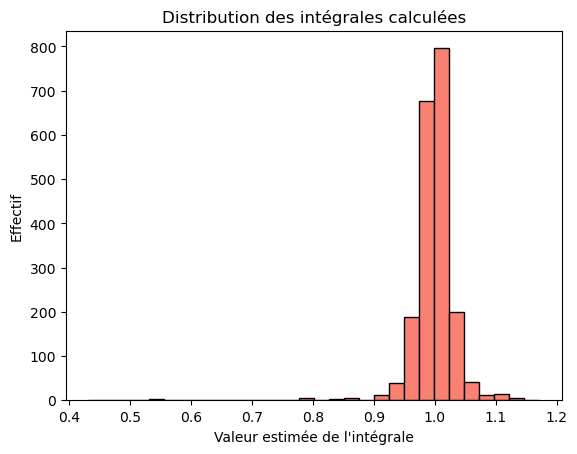

In [7]:
d = 5  # dimension de l'espace d'intégration
num_samples = 2000
plt_vals = []

for i in range(num_samples):
    result = monte_carlo_integration2(d, i+1)
    plt_vals.append(result)

plt.title("Distribution des intégrales calculées")
plt.hist (plt_vals, bins=30, color = 'salmon', ec="black") 
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.show() 

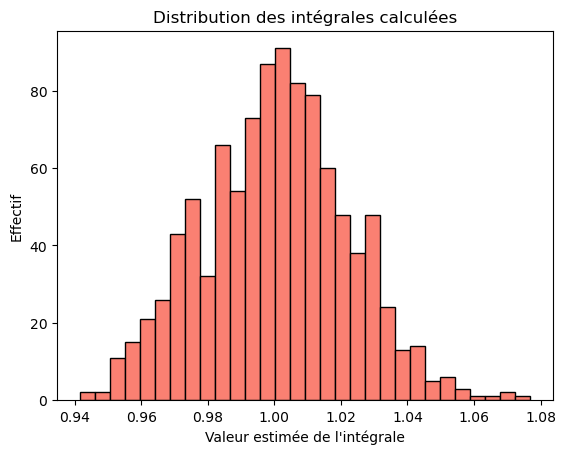

In [8]:
# Bornes d'intégration 
a = 0
b = 1 
N = 1000

# Création d'une liste pour stocker toutes les valeurs pour tracé
plt_vals = []

# Itération 
for i in range(N):

    #Array de zéros de taille N
    ar = np.zeros(N)

    # itération pour chaque valeur de 'ar' et ajout d'une valeur aléatoire entre 0 et 1 
    for i in range (len(ar)):
        ar[i] = np.random.uniform(a,b)

    # Création d'une variable qui somme les fonctions appliquées aux différentes valeurs générées
    integral = 0.0

    # Itération et somme des différents f(u)
    for i in ar:
        u = np.array([i])
        integral += f(u)

    # On estime chaque intérale 
    ans = (b-a)/float(N)*integral

    # On ajoute la valeur de l'intégrale estimée pour la tracer à la fin
    plt_vals.append(ans)

# Mise en place du tracé
plt.title("Distribution des intégrales calculées")
plt.hist (plt_vals, bins=30, color = 'salmon', ec="black") 
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.show() 

## Estimation par méthode Quasi Monte Carlo

On utilise la suite de Halton (blabla à compléter plus tard j'ai la giga flemme)

In [9]:
def quasi_monte_carlo_integration(d, num_samples):
    total = 0
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(num_samples)
    for i in range(num_samples):
        u = samples[i]
        total += f(u)
    mean_value = total/num_samples
    volume = np.prod([1.0]*d) 
    estimated_integral = mean_value * volume
    return estimated_integral

d = 2
num_samples = 1000
result = quasi_monte_carlo_integration(d, num_samples)
print("Estimated value of the integral for d={} is {:.6f}".format(d, result))

Estimated value of the integral for d=2 is 1.001129


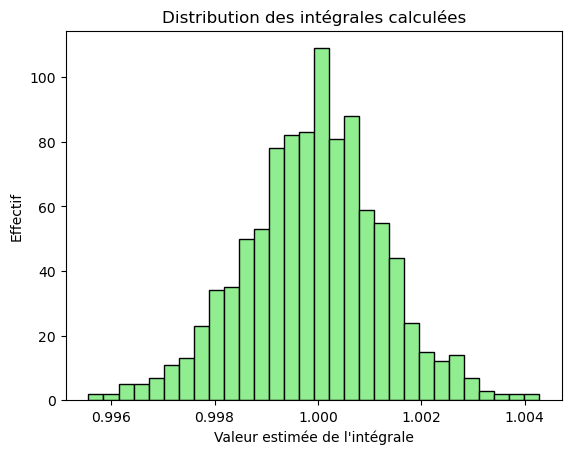

In [10]:
# limits of integration
a = 0
b = 1
d = 2
N = 1000

# list to store all the values for plotting 
plt_vals = []

# we iterate through all the values to generate 
# multiple results and show whose intensity is 
# the most.
for i in range(N):
    result = quasi_monte_carlo_integration(d, num_samples=1000)
    plt_vals.append(result)




plt.hist (plt_vals, bins=30, color='lightgreen', edgecolor='black') 
plt.title("Distribution des intégrales calculées")
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.show() # shows the plot 

Approximate the integral of f using standard Monte Carlo and quasi-Monte Carlo,
and compare the results, for different values of d (and different Monte Carlo sample
sizes!).
= bon là il faudrait tracer pour plusieurs paramètres, on peut comparer les résultats a chaque fois en faisant des stats des ou jsp en calculant des ratios (je maitrise pas encore le cours mdrr)

# 2ème partie : Implémentation des estimateurs d'ordre 1 et 2 d'Haber


##  2.1 : Estimateur d'Haber d'ordre 1 

In [18]:
r = 1
m = 0
s = 9

def C(k, s):
    C = []  # Liste pour stocker les ensembles ((2j1+1)/2k, ..., (2js+1)/2k)

    for j in itertools.product(range(k), repeat=s):
        Cj = [(2*j[i]+1)/(2*k) for i in range(s)]
        C.append(tuple(Cj))

    return C
#en vrai jsp si c la bonne solution,  a premiere vue ca m'a l'air ok mais bon


def haberordre1(s, k, f) : 
    n = k**s
    Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
    I = 0
    for c in C(k) :
        I += f(c + Uc)
    I = I / n
    return I


In [22]:
#C(3, s)

## 2.2 : Estimateur d'Haber d'ordre 2

In [21]:
def gc(u,f) :  
    g = (f(c+u) + f(c - u)) / 2

def haberordre2(s, k, f) : 
    n = 2*k**s
    Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
    I = 0
    for c in C(k) :
        I += gc(Uc)
    I = I / n
    return I